In [1]:
import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import confusion_matrix as cmat
import preprocessing as pp

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(13)

In [ ]:
X_train, X_test, y_train, y_test = pp.preprocess_game_stats()

In [16]:
print(X_train.shape), 
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(8995, 13) (8995,) (2249, 13) (2249,)


In [17]:
model_logistic = LogisticRegression(random_state=13).fit(X_train, y_train)

In [18]:
print(model_logistic.coef_.shape)
print(model_logistic.intercept_)

(3, 13)
[ 0.29306045 -0.32603163  0.03297118]


In [19]:
print(model_logistic.score(X_test, y_test))

0.5011116051578479


In [21]:
y_pred_logistic = model_logistic.predict(X_test)

In [24]:
classes = ['home win', 'OT/SO', 'away win']

for i in range(len(classes)):
    print("Predicted result " + classes[i] + ":", np.sum(y_pred_logistic == i))

Predicted result home win: 1277
Predicted result OT/SO: 204
Predicted result away win: 768


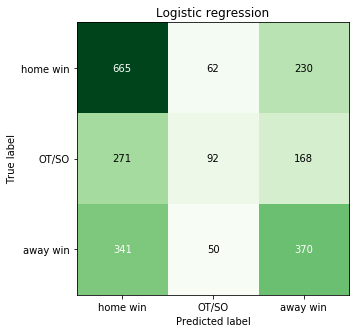

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

cmat.plot(y_test, y_pred_logistic, classes=classes, normalize=False, title="Logistic regression",
            show_colorbar=False, ax=ax)

fig.tight_layout()
fig.savefig('img/confusion_matrix_logistic.png')

In [26]:
print(classification_report(y_test, y_pred_logistic, target_names=classes))

precision    recall  f1-score   support

    home win       0.52      0.69      0.60       957
       OT/SO       0.45      0.17      0.25       531
    away win       0.48      0.49      0.48       761

    accuracy                           0.50      2249
   macro avg       0.48      0.45      0.44      2249
weighted avg       0.49      0.50      0.48      2249



In [27]:
print(log_loss(y_test, model_logistic.predict_proba(X_test)))

1.0043571921167098


In [28]:
y_pred_baseline = np.zeros((len(y_test), 3))
y_pred_baseline[:,0] = 1.0

In [29]:
print("Baseline accuracy:", accuracy_score(y_test, y_pred_baseline.argmax(axis=1)))
print("Baseline log-loss:", log_loss(y_test, y_pred_baseline))

Baseline accuracy: 0.4255224544241885
Baseline log-loss: 19.841751490540062


In [30]:
print(classification_report(y_test, y_pred_baseline.argmax(axis=1), target_names=classes))

precision    recall  f1-score   support

    home win       0.43      1.00      0.60       957
       OT/SO       0.00      0.00      0.00       531
    away win       0.00      0.00      0.00       761

    accuracy                           0.43      2249
   macro avg       0.14      0.33      0.20      2249
weighted avg       0.18      0.43      0.25      2249

/home/daniel/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
